In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython import display

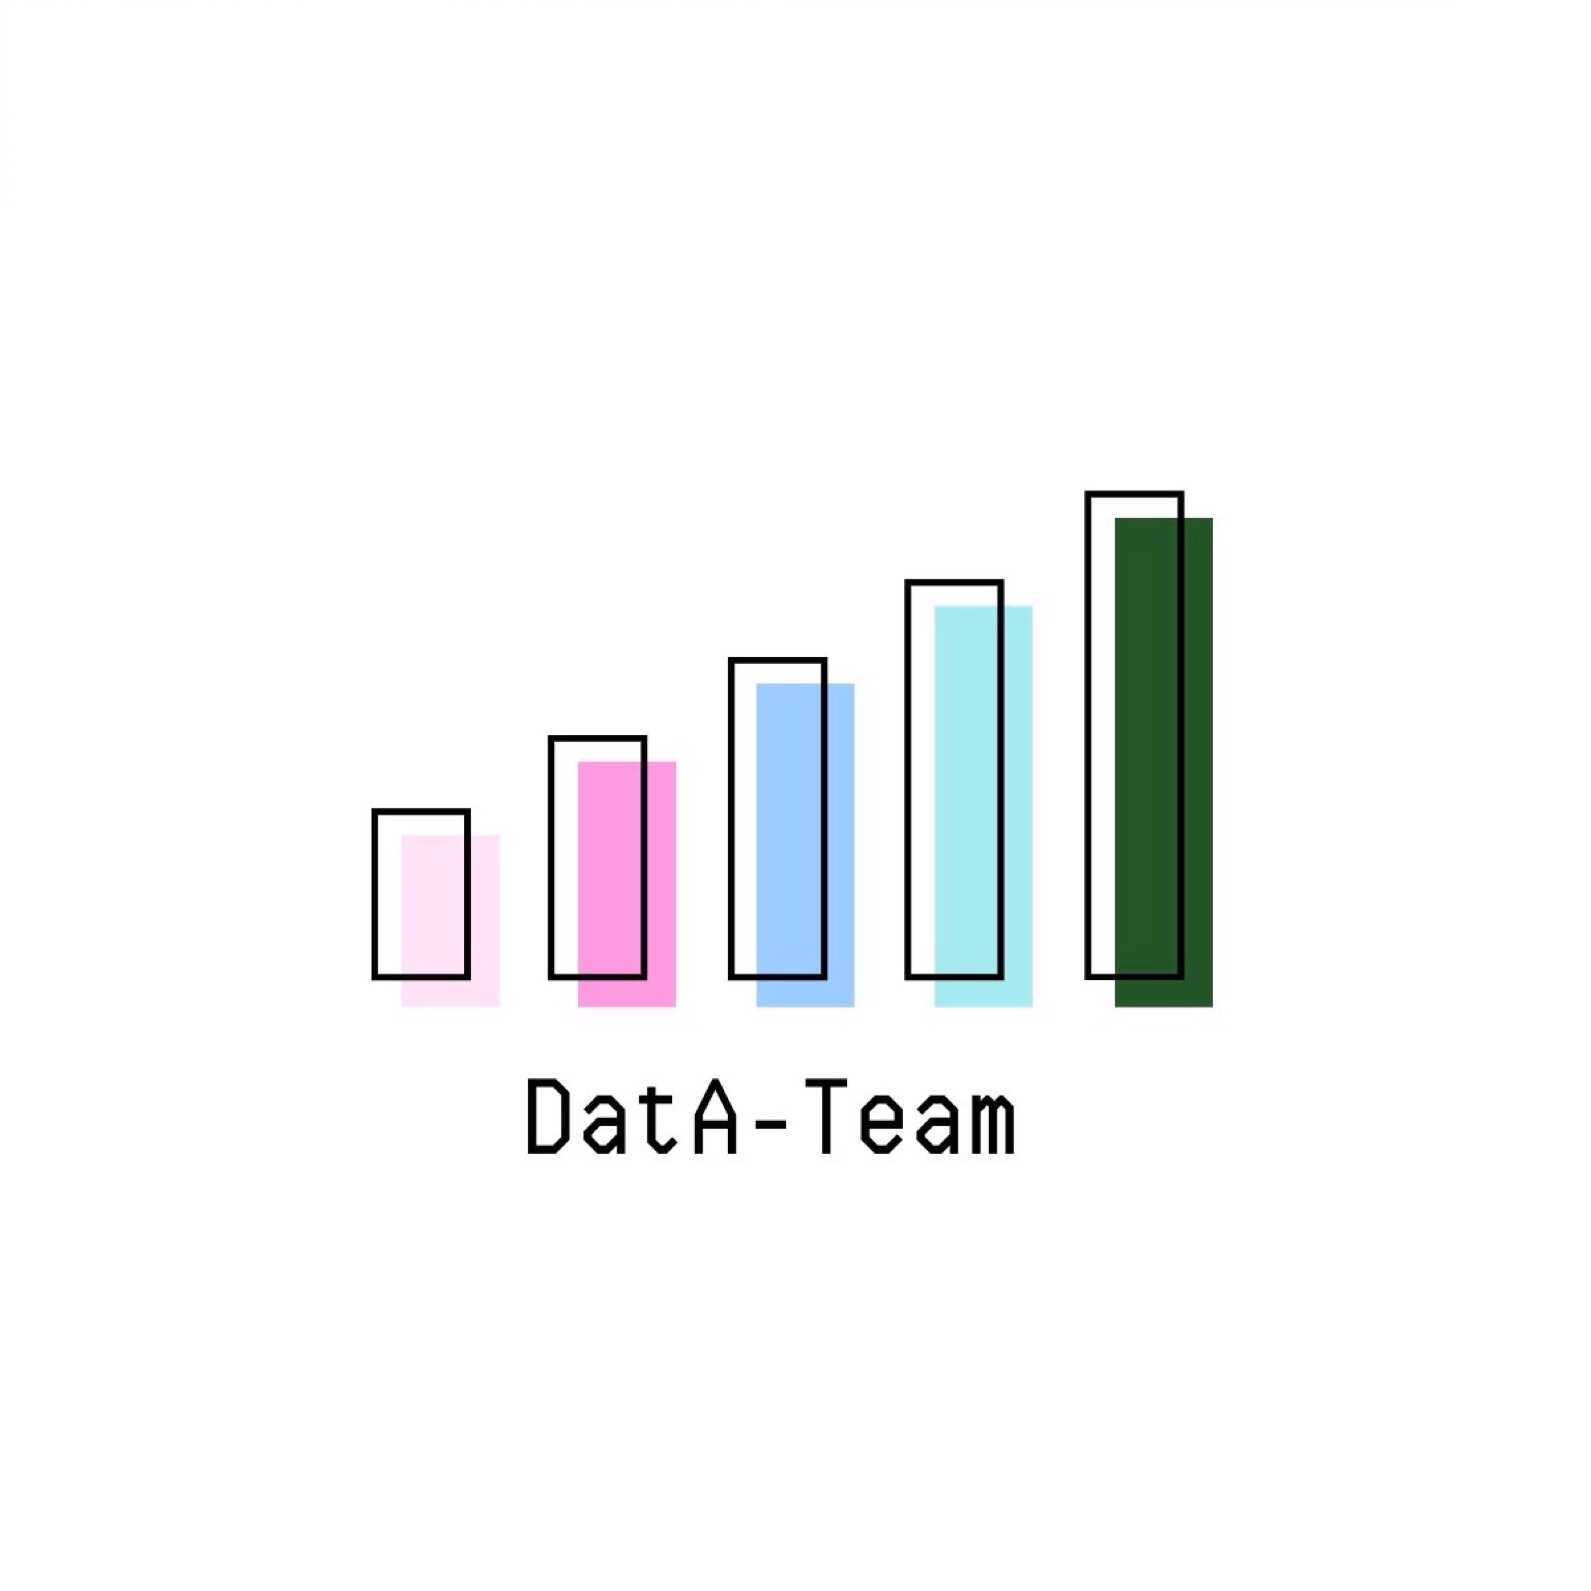

In [2]:
display.Image("./DatA_Team_logo.jpg", width=400)

# Uber Eats - What about fries?

Team members:
- Agnieszka Kołomyjec
- Barbara Wierzba-Sowińska
- Krzysztof Łukjanowicz
- Marcin Sarnowski
- Natalia Skrzypczak

### Project Description

#### abcdefghijklmnoprstuwxyz

### Contents

In [4]:
restaurants = pd.read_csv('plik.csv')

In [5]:
cheap = restaurants[restaurants['price_range']=='$']
moderate = restaurants[restaurants['price_range']=='$$']
expensive = restaurants[(restaurants['price_range']=='$$$') + (restaurants['price_range']=='$$$$')]
cheapsy = cheap.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
cheapsy.rename(columns = {'price_range': 'cheap #'}, inplace=True)

moderasy = moderate.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
moderasy.rename(columns = {'price_range': 'moderate #'}, inplace=True)

expensy = expensive.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
expensy.rename(columns = {'price_range': 'expensive #'}, inplace=True)

In [6]:
#nie ma mozliwosci łączenia wielu dataframeów na raz, więc robię to stopniowo
chm = cheapsy.merge(moderasy, how='outer', on ='state')
all = chm.merge(expensy, how='outer', on ='state')

#usuniecie wartosci NaN
all = all.fillna(0)
#nowa kolumna total
all['total'] = all['cheap #'] + all['moderate #'] + all['expensive #']

In [7]:
all['cheap #'] = all['cheap #'] / all['total'] * 100
all.rename(columns = {'cheap #': 'cheap %'}, inplace=True)
all['moderate #'] = all['moderate #'] / all['total'] * 100
all.rename(columns = {'moderate #': 'moderate %'}, inplace=True)
all['expensive #'] = all['expensive #'] / all['total'] * 100
all.rename(columns = {'expensive #': 'expensive %'}, inplace=True)
#zaokrąglenie do dwóch miejsc po przecinku
all = all.round(2)
all

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Idaho,65.22,34.78,0.00,23.0
3,Illinois,76.63,23.37,0.00,184.0
4,Maryland,74.19,24.82,0.98,713.0
5,Minnesota,58.97,41.03,0.00,39.0
6,Ohio,33.33,66.67,0.00,15.0
7,Oregon,82.23,17.21,0.56,709.0
8,Puerto Rico,91.19,8.81,0.00,159.0
9,Tennessee,76.92,23.08,0.00,39.0


In [8]:
all1 = all.drop(2)
all1 = all1.drop(5)
all1 = all1.drop(6)
all1 = all1.drop(9)
all1 = all1.reset_index(drop=True)
all1

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Illinois,76.63,23.37,0.00,184.0
3,Maryland,74.19,24.82,0.98,713.0
4,Oregon,82.23,17.21,0.56,709.0
5,Puerto Rico,91.19,8.81,0.00,159.0
6,Texas,71.22,28.44,0.34,5851.0
7,Utah,77.63,22.29,0.08,2566.0
8,Vermont,27.88,72.12,0.00,330.0
9,Virginia,80.50,18.94,0.56,8031.0


In [9]:
df = restaurants.value_counts('price_range').rename_axis('price_range').to_frame('total')
#df.loc[df['price_range']=='$$$$', 'price_range']=='$$$$$'
df['sum'] = df['total'].sum()
df['sum'] = df['total'] / df['sum'] * 100
df = df.rename(columns={'sum': '%'})
df = df.round(2)
df

,total,%
price_range,,
$,24385,72.62
$$,9029,26.89
$$$,149,0.44
$$$$,18,0.05


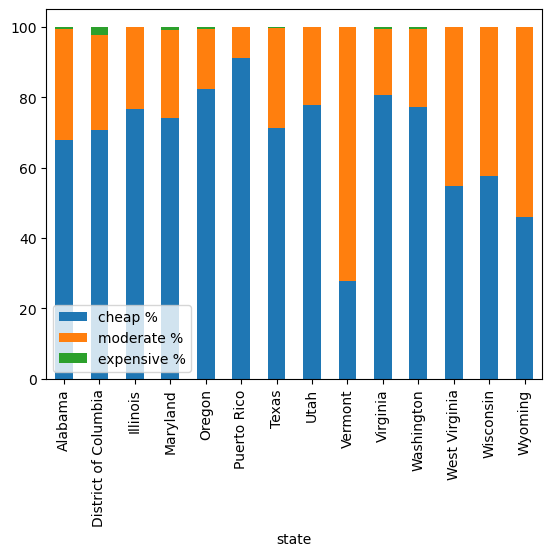

In [10]:
alltoplot = all1.drop("total", axis='columns')
alltoplot.plot(x="state", kind = 'bar', stacked=True, mark_right=True);

In [11]:
veg = restaurants[restaurants['category'].notna()]
vege = veg[veg['category'].str.contains('Veg')]

Suma restauracji, w których są dania z kategorii "vege" w poszczególnych stanach

In [21]:
vegsum = pd.pivot_table(vege, index='state', values='id', aggfunc=len)
vegsum = vegsum.rename(columns={'id': 'Total restaurants with veg'})
vegsum.reset_index(inplace=True)
vegsum

,state,Total restaurants with veg
0,Alabama,69
1,District of Columbia,183
2,Idaho,1
3,Illinois,9
4,Maryland,111
5,Oregon,121
6,Puerto Rico,11
7,Tennessee,1
8,Texas,558
9,Utah,219


Ilość restauracji w poszczególnych stanach (punkt odniesienia)

In [22]:
totalres = pd.pivot_table(restaurants, index='state', values='id', aggfunc=len)
totalres = totalres.rename(columns={'id': 'Total restaurants'})
totalres

,Total restaurants
state,
Alabama,1114
District of Columbia,1517
Idaho,27
Illinois,204
Maryland,897
Minnesota,43
Ohio,15
Oregon,1031
Puerto Rico,220


In [23]:
sumresveg = totalres.merge(vegsum, how='outer', on = 'state')
sumresveg = sumresveg.fillna(0)
sumresveg

,state,Total restaurants,Total restaurants with veg
0,Alabama,1114,69.0
1,District of Columbia,1517,183.0
2,Idaho,27,1.0
3,Illinois,204,9.0
4,Maryland,897,111.0
5,Minnesota,43,0.0
6,Ohio,15,0.0
7,Oregon,1031,121.0
8,Puerto Rico,220,11.0
9,Tennessee,42,1.0


Procentowa ilość restauracji wege w poszczególnych stanach

In [24]:
sumresveg['veg restaurants %'] = sumresveg['Total restaurants with veg'] / sumresveg['Total restaurants'] * 100
sumresveg = sumresveg.round(2)
#sumresveg.reset_index(inplace=True)
sumresveg

,state,Total restaurants,Total restaurants with veg,veg restaurants %
0,Alabama,1114,69.0,6.19
1,District of Columbia,1517,183.0,12.06
2,Idaho,27,1.0,3.70
3,Illinois,204,9.0,4.41
4,Maryland,897,111.0,12.37
5,Minnesota,43,0.0,0.00
6,Ohio,15,0.0,0.00
7,Oregon,1031,121.0,11.74
8,Puerto Rico,220,11.0,5.00
9,Tennessee,42,1.0,2.38


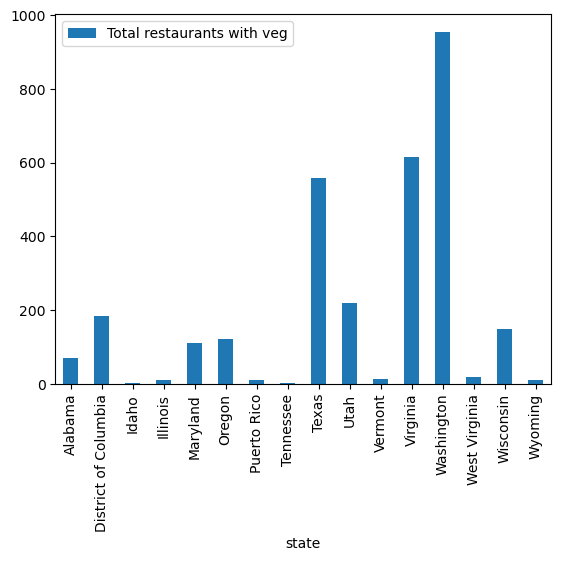

In [25]:
vegsum.plot(kind='bar', x='state', y='Total restaurants with veg')
plt.show()

In [26]:
vegpr = vege.value_counts('price_range').rename_axis('price_range').to_frame('total')
vegpr = vegpr.reset_index()
vegpr['sum'] = vegpr['total'].sum()
vegpr['sum'] = vegpr['total'] / vegpr['sum']*100
vegpr = vegpr.round(2)
vegpr

,price_range,total,sum
0,$,1571,71.90
1,$$,604,27.64
2,$$$,9,0.41
3,$$$$,1,0.05


In [34]:
alltoplot = vegpr.drop("total", axis='columns')
alltoplot.plot(x="price_range", kind = 'bar', stacked=True, mark_right=True);

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

In [28]:
score=restaurants.groupby('score')['id'].count()# informacja o tym ile reatauracji ma ocene od 1.3 do 5.0
score


score
1.3       1
1.9       1
2.0       1
2.1       3
2.2       1
2.3       1
2.4       1
2.5       1
2.6       3
2.7      10
2.8       7
2.9      10
3.0      12
3.1      11
3.2      34
3.3      24
3.4      39
3.5      61
3.6      75
3.7     115
3.8     202
3.9     285
4.0     376
4.1     624
4.2     976
4.3    1311
4.4    1876
4.5    2665
4.6    3325
4.7    3966
4.8    3824
4.9    1839
5.0     574
Name: id, dtype: int64

In [29]:
restaurants.groupby('price_range')["id"].count()


price_range
$       24385
$$       9029
$$$       149
$$$$       18
Name: id, dtype: int64

In [30]:

ratings=restaurants.groupby('ratings')['id'].count() #informacja o tym ile ocen ma ile restauracji
ratings

ratings
10.0     497
11.0     475
12.0     480
13.0     414
14.0     381
        ... 
494.0      1
495.0      1
496.0      1
498.0      1
500.0    125
Name: id, Length: 416, dtype: int64

In [31]:
ratings_score =restaurants.groupby(['ratings', 'score'])['id'].count() #nie wiem czemu po połączeniu nie pokazuje wszytskeigo
ratings_score


ratings  score
10.0     2.7       1
         2.8       2
         2.9       1
         3.0       2
         3.1       1
                  ..
500.0    4.5       7
         4.6      23
         4.7      28
         4.8      44
         4.9      18
Name: id, Length: 2565, dtype: int64

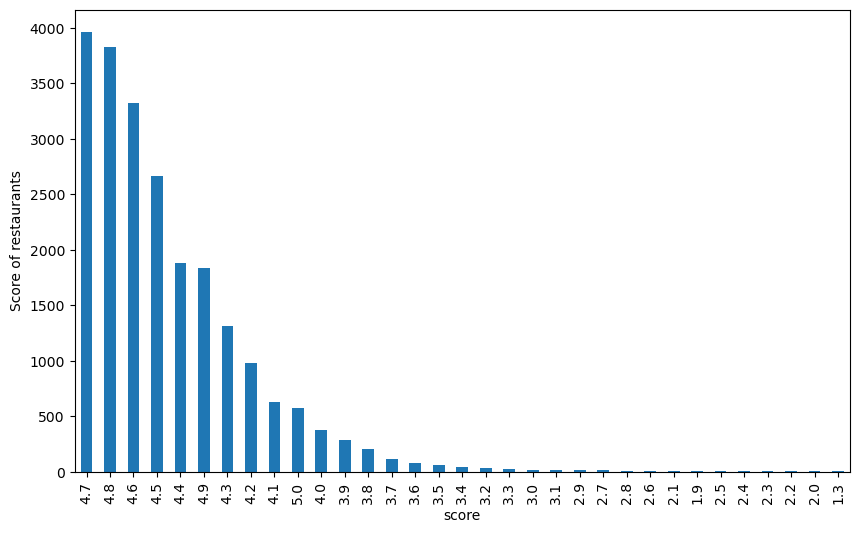

In [32]:
restaurants.groupby('score')['id'].count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,6), ylabel="Score of restaurants", xlabel="score");
restaurants_copy = restaurants[['name', 'category', 'state', 'score', 'ratings']].copy() #kopia tabeli restauracje po to zeby pokazać jakie scory są w podziale na kategorie